# Homework 2. Exploratory Data Analysis


---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

#### Data
For this assignment we will use two databases: 

1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."

2. [Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [3]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

# importing libraries for you'll need for this homework
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats 

## Problem 1

In class, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared. 

#### Problem 1(a) 
Download [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) into the same directory as this notebook. For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the first few lines of each table using the head method on each table.


In [4]:
salaries = pd.read_csv('Salaries.csv')
print("Number of rows: %i" % salaries.shape[0])
salaries.head()

Number of rows: 23956


,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819
1,1985,BAL,AL,lynnfr01,1090000
2,1985,BAL,AL,ripkeca01,800000
3,1985,BAL,AL,lacyle01,725000
4,1985,BAL,AL,flanami01,641667


In [5]:
teams = pd.read_csv('Teams.csv')
teams = teams[['yearID', 'teamID', 'W']]
print("Number of rows: %i" % teams.shape[0])
teams.head()

Number of rows: 2745


,yearID,teamID,W
0,1871,PH1,21
1,1871,CH1,19
2,1871,BS1,20
3,1871,WS3,15
4,1871,NY2,16


#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [9]:
#your code here

totSalaries = salaries.groupby(['yearID','teamID'], as_index=False).sum()
totSalaries

,yearID,teamID,salary
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178
5,1985,CHN,12702917
6,1985,CIN,8359917
7,1985,CLE,6551666
8,1985,DET,10348143
9,1985,HOU,9993051


#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

To merge these two DataFrames, we can use the `merge` function to join together DataFrame objects `on` a set of column names (must be found in both DataFrames) and `how` (union, intersection, only rows from one data set or the other). Below, we use the arguments `how="inner"` to take the intersection of the rows and `on=['yearID', 'teamID']` the column names `yearID` and `teamID` which can be found in both DataFrames. 

In [5]:
joined = pd.merge(totSalaries, teams, how="inner", on=['yearID', 'teamID'])
joined.head()

,yearID,teamID,salary,W
0,1985,ATL,14807000,66
1,1985,BAL,11560712,83
2,1985,BOS,10897560,81
3,1985,CAL,14427894,90
4,1985,CHA,9846178,85


#### Problem 1(d)

Explore the relationship between wins and salaries.  How would you graphically display the relationship between total wins and total salaries for a range of years? What kind of plot would be best? 

Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 


Step 1:  Subset the dataset describing the salaries of all teams in the year 2000 and assign it to a variable, like, 'salaries'.   Also, subset the number of wins, assigning it to an appropriate variable.

Step 2:  Make a plot to show the data for all teams.  BONUS:  Can you annotate the Oakland team datapoint?  [Hint](https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/annotation_demo.html)

Example:
```
plt.annotate('OAK', xy=(salaries_oakland, total_wins_oakland), xycoords='data')
```

Step 3:  Use a `for` loop to consider multiple years. The following command might be helpful.

```
years = np.arange(2000, 2004)
```

Write a *for loop* and appropriate variables to generate the same plot for all 4 years.  

Make a scatterplot of wins as a funciton of salary for the year 2000.  Hint:  You may want to divide this by 1e6, so that when you plot these values it is more readable.  Add a title and axis labels.  You can also add a grid to your plot with the plt.grid() method from matplotlib.  

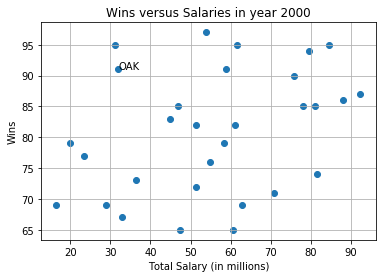

In [6]:
#your code here
df = joined
year = 2000
df_subset = df[df['yearID'] == year] 
df_oakland = df_subset[df_subset['teamID'] == "OAK"]
salaries = df[df['yearID'] == year]['salary'] / 1e6
total_wins = df[df['yearID'] == year]['W']
salaries_oakland = df_oakland['salary'] / 1e6
total_wins_oakland = df_oakland['W']
plt.scatter(salaries, total_wins)
plt.annotate('OAK', xy=(salaries_oakland, total_wins_oakland), xycoords='data')
plt.title('Wins versus Salaries in year ' + str(year))
plt.xlabel('Total Salary (in millions)')
plt.ylabel('Wins')
plt.grid()
plt.show()


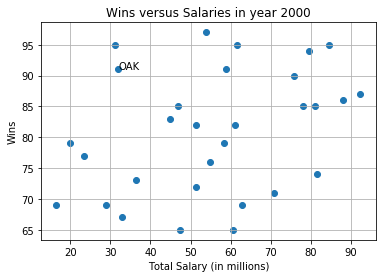

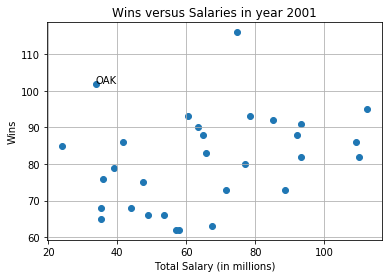

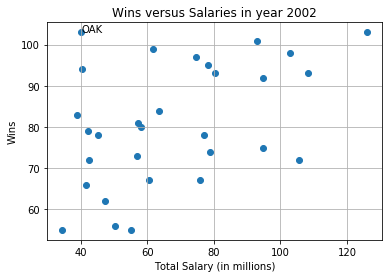

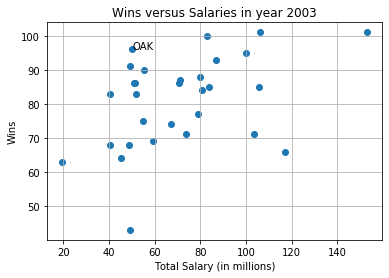

In [7]:
years = np.arange(2000, 2004)

for yr in years: 
    df = joined
    year = yr
    df_subset = df[df['yearID'] == year] 
    df_oakland = df_subset[df_subset['teamID'] == "OAK"]
    salaries = df[df['yearID'] == year]['salary'] / 1e6
    total_wins = df[df['yearID'] == year]['W']
    salaries_oakland = df_oakland['salary'] / 1e6
    total_wins_oakland = df_oakland['W']
    plt.scatter(salaries, total_wins)
    plt.annotate('OAK', xy=(salaries_oakland, total_wins_oakland), xycoords='data')
    plt.title('Wins versus Salaries in year ' + str(year))
    plt.xlabel('Total Salary (in millions)')
    plt.ylabel('Wins')
    plt.grid()
    plt.show()


We see a competitive advantage can be detected in years 2001-2003 for the Oakland baseball team, because in those years Oakland spent much less in salary compared to other teams, but stood out with the number of wins.  

#### BONUS:  Problem 1(e):

Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

Step 1:

You will want to first know how to find a least squares solution to this problem.  We did not directly cover this in class, but let's see if you can practice reading some documentation for Python's numpy package and the [linear algebra methods](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html).

Note in the example, that you must convert your two datasets for linear correlation into a numpy array in order to use these methods and the example walks you through that.  The output of this method is the slope and intercept to calculate the theoretical estimate.

*Hint:  To convert your pandas dataframe data types to values you can use the `.values` method in pandas.  e.g., df['salary'].values.*

Step 2:

You will want to next calculate the residuals for each team, the difference of teh observed value minus the theoretical.  

$$e_i = y_i - \hat{y}_i$$

Step 3. 

Store the residuals as a data frame where values are categorized by year.  (Hint:  you may want to initiate an empty data frame to store this data in).  Make sure that the index for each data frame is appropriate for the dataset and represents the teamID.

Step 4.

Plot the residuals for each team across time. 


For each year, we perform the following: 

1. Calculate the least squares estimate of the coefficients in a linear regression model where x = salaries (in millions) and y = total wins.  

Hint:  One way to 
2. Calculate the residuals for each team: $$e_i = y_i - \hat{y}_i$$
3. Plot the residuals for each team across time. 

To 

/Users/adina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


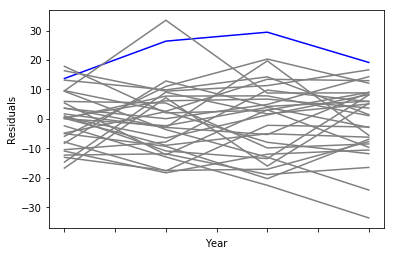

In [106]:
teamName = 'OAK'
years = np.arange(2000, 2004)
residData = pd.DataFrame()

for yr in years: 
    df = joined[joined['yearID'] == yr]
    x_list = df['salary'].values / 1e6
    y_list = df['W'].values

    # least squares estimates
    x = np.array(x_list)
    y = np.array(y_list)
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y)[0] #coefficients    
    yhat = (m*x_list+c) # regression line
    residData[yr] = y - yhat

residData.index = df['teamID']
residData = residData.T
residData.index = residData.index.format()

residData.plot(color=map(lambda x: 'blue' if x=='OAK' else 'gray',df.teamID))
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.legend().set_visible(False)
plt.show()

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

Considering the plots from 1(d) and potentially 1(e) (bonus), we see the Oakland baseball team stood out amongst the other baseball teams in terms of their ability to win a large amount of games with a small budget from 2001-2003.  Upon futher reading, we can attributed this to Billy Beane's effort to use "sabermetrics" (or the empirical analysis of baseball data) at the Oakland A's. He was able to find the most undervalued players and baseball and hire them on a reduced budget.  

---


## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. 

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [23]:
import pandas as pd

url="https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
countries=pd.read_csv(url, sep=",")
countries.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.  The spreadsheet contains the GDP per capita for each country by year.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [41]:
income=pd.read_excel("indicator gapminder gdp_per_capita_ppp.xlsx", sheet_name = "Data")
income.head()


,Year,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [50]:
income=pd.read_excel("indicator gapminder gdp_per_capita_ppp.xlsx", sheet_name = "Data")
income.index = income[income.columns[0]]
income = income.drop(income.columns[0], axis = 1)
income.head()
income = income.transpose()
income.head()

Year,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,nan,nan
1800,NaN,603.0,NaN,667.0,716.0,NaN,1197.0,618.0,NaN,757.0,...,NaN,NaN,877.0,NaN,663.0,869.0,NaN,507.0,NaN,NaN
1801,NaN,603.0,NaN,667.0,716.0,NaN,1199.0,620.0,NaN,757.0,...,NaN,NaN,879.0,NaN,665.0,870.0,NaN,507.0,NaN,NaN
1802,NaN,603.0,NaN,668.0,717.0,NaN,1201.0,623.0,NaN,757.0,...,NaN,NaN,882.0,NaN,667.0,871.0,NaN,507.0,NaN,NaN
1803,NaN,603.0,NaN,668.0,718.0,NaN,1204.0,626.0,NaN,757.0,...,NaN,NaN,884.0,NaN,668.0,872.0,NaN,507.0,NaN,NaN
1804,NaN,603.0,NaN,668.0,719.0,NaN,1206.0,628.0,NaN,757.0,...,NaN,NaN,887.0,NaN,670.0,873.0,NaN,508.0,NaN,NaN


In [57]:
import matplotlib.pyplot as plt
import math

income_2000 = income.loc[2000]
plt.hist(math.log(income_2000.dropna()), bins = 20)


TypeError: cannot convert the series to <class 'float'>

#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

Here we use a histogram to plot the distribution of income per person in a given year across all the countries on the dollar scale and the log10(dollar) scale. 

In [9]:
income=pd.read_excel("indicator gapminder gdp_per_capita_ppp.xlsx", sheet_name = "Data")
income.index=income[income.columns[0]] # Make the countries as the index
income = income.drop(income.columns[0], axis = 1) 
income.columns = map(lambda x: int(x), income.columns) # Convert years from floats to ints
income = income.transpose()
income.head()

Year,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,nan,nan
1800,NaN,603.0,NaN,667.0,716.0,NaN,1197.0,618.0,NaN,757.0,...,NaN,NaN,877.0,NaN,663.0,869.0,NaN,507.0,NaN,NaN
1801,NaN,603.0,NaN,667.0,716.0,NaN,1199.0,620.0,NaN,757.0,...,NaN,NaN,879.0,NaN,665.0,870.0,NaN,507.0,NaN,NaN
1802,NaN,603.0,NaN,668.0,717.0,NaN,1201.0,623.0,NaN,757.0,...,NaN,NaN,882.0,NaN,667.0,871.0,NaN,507.0,NaN,NaN
1803,NaN,603.0,NaN,668.0,718.0,NaN,1204.0,626.0,NaN,757.0,...,NaN,NaN,884.0,NaN,668.0,872.0,NaN,507.0,NaN,NaN
1804,NaN,603.0,NaN,668.0,719.0,NaN,1206.0,628.0,NaN,757.0,...,NaN,NaN,887.0,NaN,670.0,873.0,NaN,508.0,NaN,NaN


In [14]:
year = 2000
income_2000 = income.loc[year]
income_2000

Year
Abkhazia                         NaN
Afghanistan                    962.0
Akrotiri and Dhekelia            NaN
Albania                       5305.0
Algeria                       9885.0
American Samoa                   NaN
Andorra                      31662.0
Angola                        3387.0
Anguilla                         NaN
Antigua and Barbuda          19319.0
Argentina                    11504.0
Armenia                       2919.0
Aruba                        43703.0
Australia                    35253.0
Austria                      38548.0
Azerbaijan                    4459.0
Bahamas                      25858.0
Bahrain                      45063.0
Bangladesh                    1632.0
Barbados                     14677.0
Belarus                       7300.0
Belgium                      37404.0
Belize                        7215.0
Benin                         1525.0
Bermuda                      51140.0
Bhutan                        3596.0
Bolivia                       433

In [19]:
income=pd.read_excel("indicator gapminder gdp_per_capita_ppp.xlsx", sheet_name = "Data")
income.index=income[income.columns[0]] # Make the countries as the index
income = income.drop(income.columns[0], axis = 1) 
income.columns = map(lambda x: int(x), income.columns) # Convert years from floats to ints
income = income.transpose()



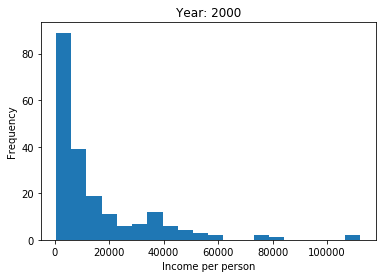

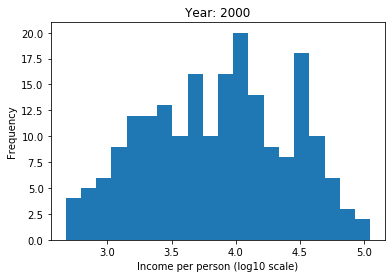

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(income_2000.dropna().values, bins = 20)
plt.title('Year: %i' % year)
plt.xlabel('Income per person')
plt.ylabel('Frequency')
plt.show()


plt.hist(np.log10(income_2000.dropna().values), bins = 20)
plt.title('Year: %i' % year)
plt.xlabel('Income per person (log10 scale)')
plt.ylabel('Frequency')
plt.show()



In [21]:
income.index.values

array([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810,
       1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821,
       1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832,
       1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843,
       1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854,
       1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865,
       1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876,
       1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887,
       1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898,
       1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909,
       1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920,
       1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 19

#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

In [78]:
data = pd.DataFrame()
data['Income'] = income.loc[2000]
data['Country'] = income.columns
data.reset_index()
data.head()
joined = pd.merge(data, countries, how="inner", on = ['Country'])
joined.head()

,Income,Country,Region
0,962.0,Afghanistan,ASIA
1,5305.0,Albania,EUROPE
2,9885.0,Algeria,AFRICA
3,31662.0,Andorra,EUROPE
4,3387.0,Angola,AFRICA


In [79]:
def mergeByYear(year, income):
    data = pd.DataFrame()
    data['Income'] = income.loc[year]
    data['Country'] = income.columns
    data.reset_index()
    joined = pd.merge(data, countries, how="inner", on = ['Country'])
    return joined

In [81]:
mergeByYear(1990, income)

,Income,Country,Region
0,1028.0,Afghanistan,ASIA
1,4350.0,Albania,EUROPE
2,10113.0,Algeria,AFRICA
3,28417.0,Andorra,EUROPE
4,4232.0,Angola,AFRICA
5,17154.0,Antigua and Barbuda,NORTH AMERICA
6,8539.0,Argentina,SOUTH AMERICA
7,3736.0,Armenia,EUROPE
8,28604.0,Australia,OCEANIA
9,31053.0,Austria,EUROPE


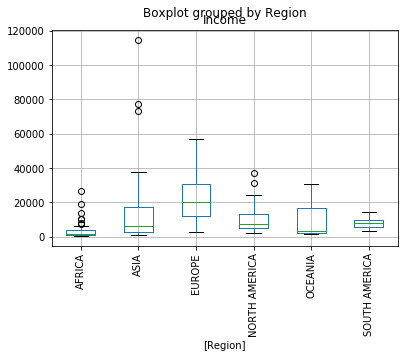

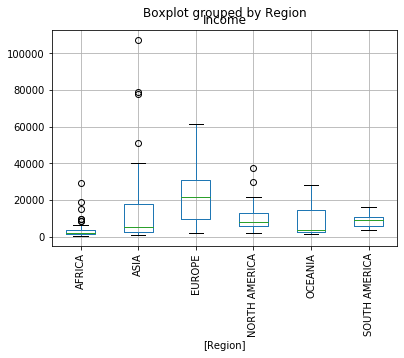

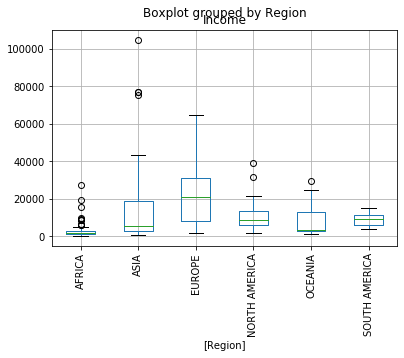

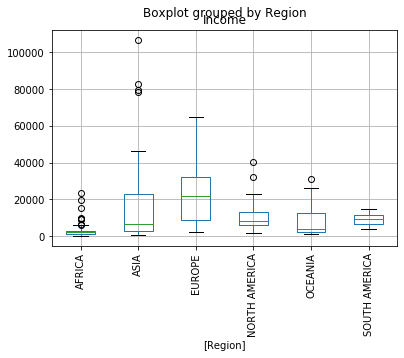

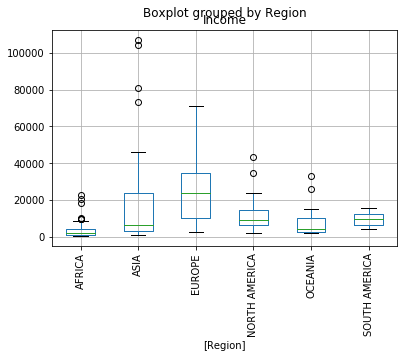

In [91]:
years= range(1990, 2000, 2)

for year in years:
    df = mergeByYear(year, income)
    df.boxplot(by='Region', rot = 90)

In [21]:
"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""
#your code here

def mergeByYear(year):
    data = pd.DataFrame(income.loc[year].values, columns = ['Income'])
    data['Country'] = income.columns
    joined = pd.merge(data, countries, how="inner", on=['Country'])
    joined.Income = np.round(joined.Income, 2)
    return joined



In [22]:
mergeByYear(2000)

,Income,Country,Region
0,962.0,Afghanistan,ASIA
1,5305.0,Albania,EUROPE
2,9885.0,Algeria,AFRICA
3,31662.0,Andorra,EUROPE
4,3387.0,Angola,AFRICA
5,19319.0,Antigua and Barbuda,NORTH AMERICA
6,11504.0,Argentina,SOUTH AMERICA
7,2919.0,Armenia,EUROPE
8,35253.0,Australia,OCEANIA
9,38548.0,Austria,EUROPE


#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

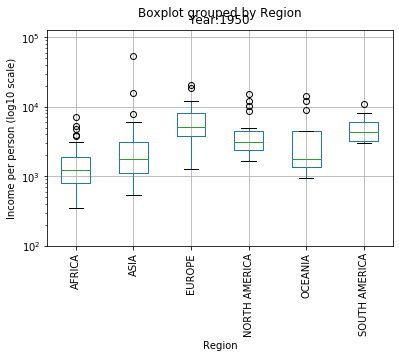

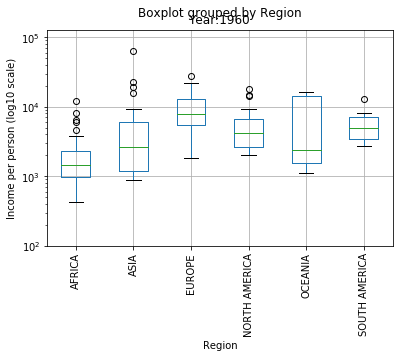

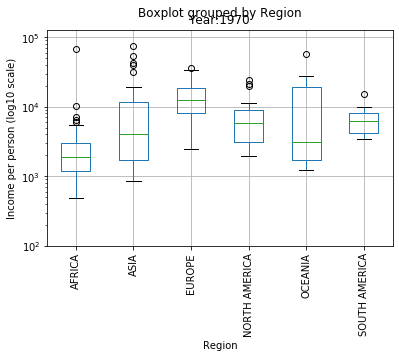

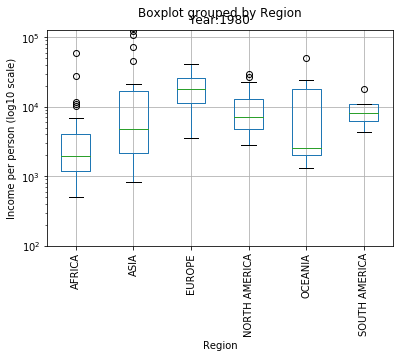

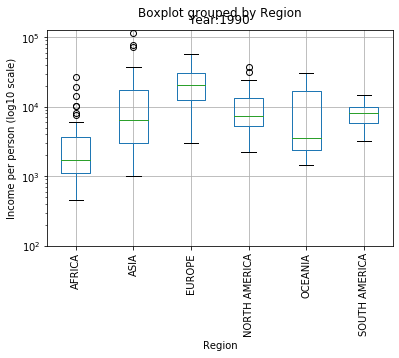

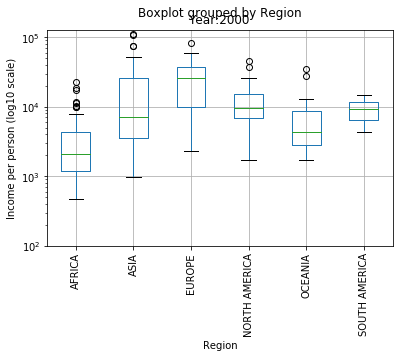

In [107]:
#your code here

years = range(1950, 2010, 10)

for yr in years:
    df = mergeByYear(yr)
    df.boxplot('Income', by = 'Region', rot = 90)
    plt.title("Year:" + str(yr))
    plt.ylabel('Income per person (log10 scale)')
    plt.ylim(10**2, 10.5 **5)
    plt.yscale('log')

In recent years, Africa and Asia have an upwards trend in average income per person while other continents have stayed more constant through the 20th century. 

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

In most continents (especially Africa and Asia), we see that the distribution of incomes is very skewed: most countries are in a group of low-income states with a fat tail of high-income countries that remains approximately constant throughout the 20th century.  In 2(b) we used a histogram to look at the income distribution of all countries in the world for a given year saw a non-normal distribution. In 2(d) we used boxplots to take a closer look at the income distribution of countries grouped by regions across decades.  We saw upward trends in average income per person across certain regions (e.g. Africa) as we moved through the 20th century.

---


## Problem 3: Is the average of polls better than just one poll?


The [HuffPost Pollster](http://elections.huffingtonpost.com/pollster) contains many political polls. You can access these polls from individual races as a CSV but you can also access polls through the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api) to access the data.  

Read in the polls from the [2012 Presidential Election: Barack Obama vs Mitt Romney](http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama) into a pandas DataFrame called `election`. For this problem, you may read in the polls for this race directly using [the CSV file](http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv) available from the HuffPost Pollster page.

How much do you put faith into pollsters data for the election?

One way to do this is to look at the average of polls and compare this to the average of just one poll.

How would we go about that?  We have poll data from varying days before the election, so a practical strategy might be to look at data within a certain time window.  

### Problem 3a.  

Load the data and subset data from November and then for 5 days before the election.  You will need to use likely some module that deals with dates and time and dive into some documentation to know how to use it.

In [92]:

url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"
election = pd.read_csv(url, sep = ",")


In [114]:
import datetime

election['Start Date'] = pd.to_datetime(election['Start Date'])
election['Start Day'] = election['Start Date'].apply(lambda x: x.day)
election.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Start Day
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,4
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,3
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,3
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,3
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,3


In [253]:
#your code here
election["Diff"] = (election.Obama / 100) - (election.Romney / 100)
election.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Diff
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


Filter out election results from November.

In [254]:
#your code here
import datetime

election['Start Date'] = pd.to_datetime(election['Start Date'])
election['Start Month'] = election['Start Date'].apply(lambda x: x.month)
election['Start Year'] = election['Start Date'].apply(lambda x: x.year)
election['Start Day'] = election['Start Date'].apply(lambda x: x.day)
filtered = election[(election['Start Month'] == 11) & (election['Start Year'] == 2012)]



In [248]:
filtered.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,...,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Diff,Start Month,Start Year,Start Day,days_between
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00,11,2012,4,0
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02,11,2012,3,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00,11,2012,3,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01,11,2012,3,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01,11,2012,3,1


In [249]:
last_day = max(election['Start Date'])
election['days_between'] = last_day - election['Start Date']
election['days_between'] = election['days_between'].dt.days
one_week = election[election['days_between'] <= 5]
one_week.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,...,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Diff,Start Month,Start Year,Start Day,days_between
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00,11,2012,4,0
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02,11,2012,3,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00,11,2012,3,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01,11,2012,3,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01,11,2012,3,1


### Problem 3(b)
Make a plot of the differences for the week before the election (e.g. 5 days) where the days are on the x-axis and the differences are on the y-axis. 

Text(0.5, 1.0, 'Plot of the difference between Obama and Romney in the last week')

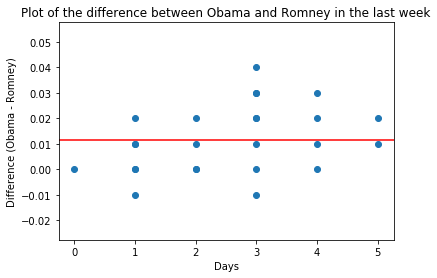

In [251]:
plt.scatter(one_week['days_between'], one_week['Diff']) 
plt.axhline(y=np.mean(one_week.Diff), c = "red")
plt.xlabel("Days")
plt.ylabel("Difference (Obama - Romney)")
plt.title("Plot of the difference between Obama and Romney in the last week")



### Problem 3(c)

Is the across poll difference larger than the between pollster difference?

For this question, we can compare the variability within each pollster (across a set of polls) compared to the variability between each pollster. From these two visualization, is the pollster difference small or large?

Make a plot showing the differences by pollster where the pollsters are on the x-axis and the differences on the y-axis.  Compute the average for each pollster and then compute the average of that.  Draw this line on the plot.

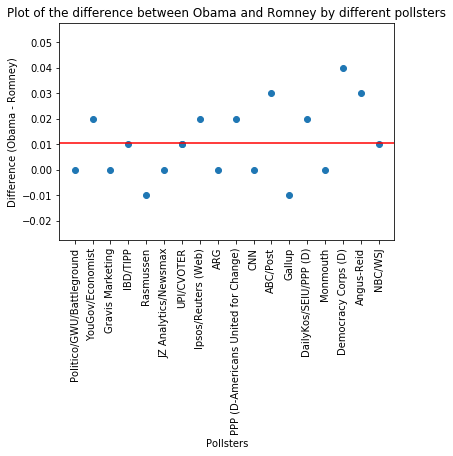

In [246]:
aggr  = filtered.groupby("Pollster").mean()
avg_diff = np.mean(aggr['Diff'])

plt.scatter(filtered['Pollster'], filtered['Diff'])
plt.axhline(y = avg_diff, c = "red")
plt.xticks(range(len(polls)), polls, rotation = 90)
plt.xlabel("Pollsters")
plt.ylabel("Difference (Obama - Romney)")
plt.title("Plot of the difference between Obama and Romney by different pollsters")
plt.show()

Calculate the average difference across pollsters and the standard error?

In [228]:
#your code here
aggr  = filtered.groupby("Pollster").mean()
print("Average across pollsters: %g" % np.round(np.mean(aggr.Diff),4))
print("Standard error: %g" % np.std(aggr.Diff, ddof = 0))

Average across pollsters: 0.0106
Standard error: 0.0139333


### Proble 3(d): 

How much do you put faith into pollsters data for the election?  Problem 3: Is the average of polls better than just one poll?
